# Exercise 7 Solution


In this problemset related to Lecture 9 you will make use the knowledge on the spherical and planar electromagnetic waves to explore optical microscopy. In particular we will explore the resolution of optical microscopy. You may want to have a look at the slit example in the Huygens principle part of Lecture 9.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 20,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 4,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Resolution of an optical Microscope

We will study the intensity distribution in the focus of a lens with the help of spherical waves and plane waves.

### Spherical Wave Study

#### Task 1

Write a function `spherical_wave` for generating a spherical wave originating from a position $r_{0}$ being a 3-dimensional vector. Arguments to the function shall be the wavevector and the position at which to calculate the electric field, as well as the origin of the spherical wave. The function shall return the electric field as a scalar value. 

In [3]:
### BEGIN SOLUTION
def spherical_wave(k,r,r0):
    k=np.linalg.norm(k)
    d=np.linalg.norm(r-r0)
    return( np.exp(1j*(k*d))/d)
### END SOLUTION

To simulate the electric field of an objective lens, we use Huygens principle and arrange the spherical sources along a circle. Note that for a more realistic simulation, we would need to place the sources along the spherical cap. Overall, this calculation also corresponds to the focusing of light by a spherical mirror.
The geometry below shall illustrate the intended outcome. 


![Figure](geometry.png)


#### Task 2

Write a function `objective` that calculates the electric field from a set of spherical wave sources arranged on a circle in an angular range $2\theta$ as displayed above. The radius iof the circle should correspond to 10 µm. The circle center shall be located at $r_{0}=\{0,0,5 µm\}$. The arguments of this function shall be, the opening angle $\theta$, the position(s) for the calculation of the electric field and the number of sources to be distributed along the circle. The function shall return the total electric field from all sources as a scalar value.

In [4]:
### BEGIN SOLUTION
def objective(theta,r, n):
    field=0
    radius=10e-6
    for theta in np.linspace(-theta,theta,n):    
        r0=np.array([radius*np.sin(theta),0,-radius*np.cos(theta)+5e-6])
        field=field+spherical_wave(k,r,r0)

    field=field/np.max(field)
    return(field)    
### END SOLUTION

#### Task 3

Generate a spatial domain as in Lecture 9 to plot the intensity of the wave in 2-dimensional space (e.g. the x-z plane). The spatial domain shall cover the region from 0 µm to 30 µm in the horizontal direction (z) and -15 µm to 15 µm in the vertical direction (x).  Define a light wavelength of 532 nm and calculate the corresponding wavevector $\vec{k}=2\pi/\lambda \, \vec{e}_{z}$ and calculate the electric field.

In [8]:
### BEGIN SOLUTION
x=np.linspace(-15e-6,15e-6,1000)
z=np.linspace(0,30e-6,1000)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

wavelength=532e-9
k0=2*np.pi/wavelength
k=k0*np.array([0,0,1.])

field=objective(np.pi/1.5,100)
### END SOLUTION

#### Task 4

Plot the electric field and the intensity, i.e. $I\propto |E|^{2}$, where $E$ is the total electric field of all waves in two separate plots.

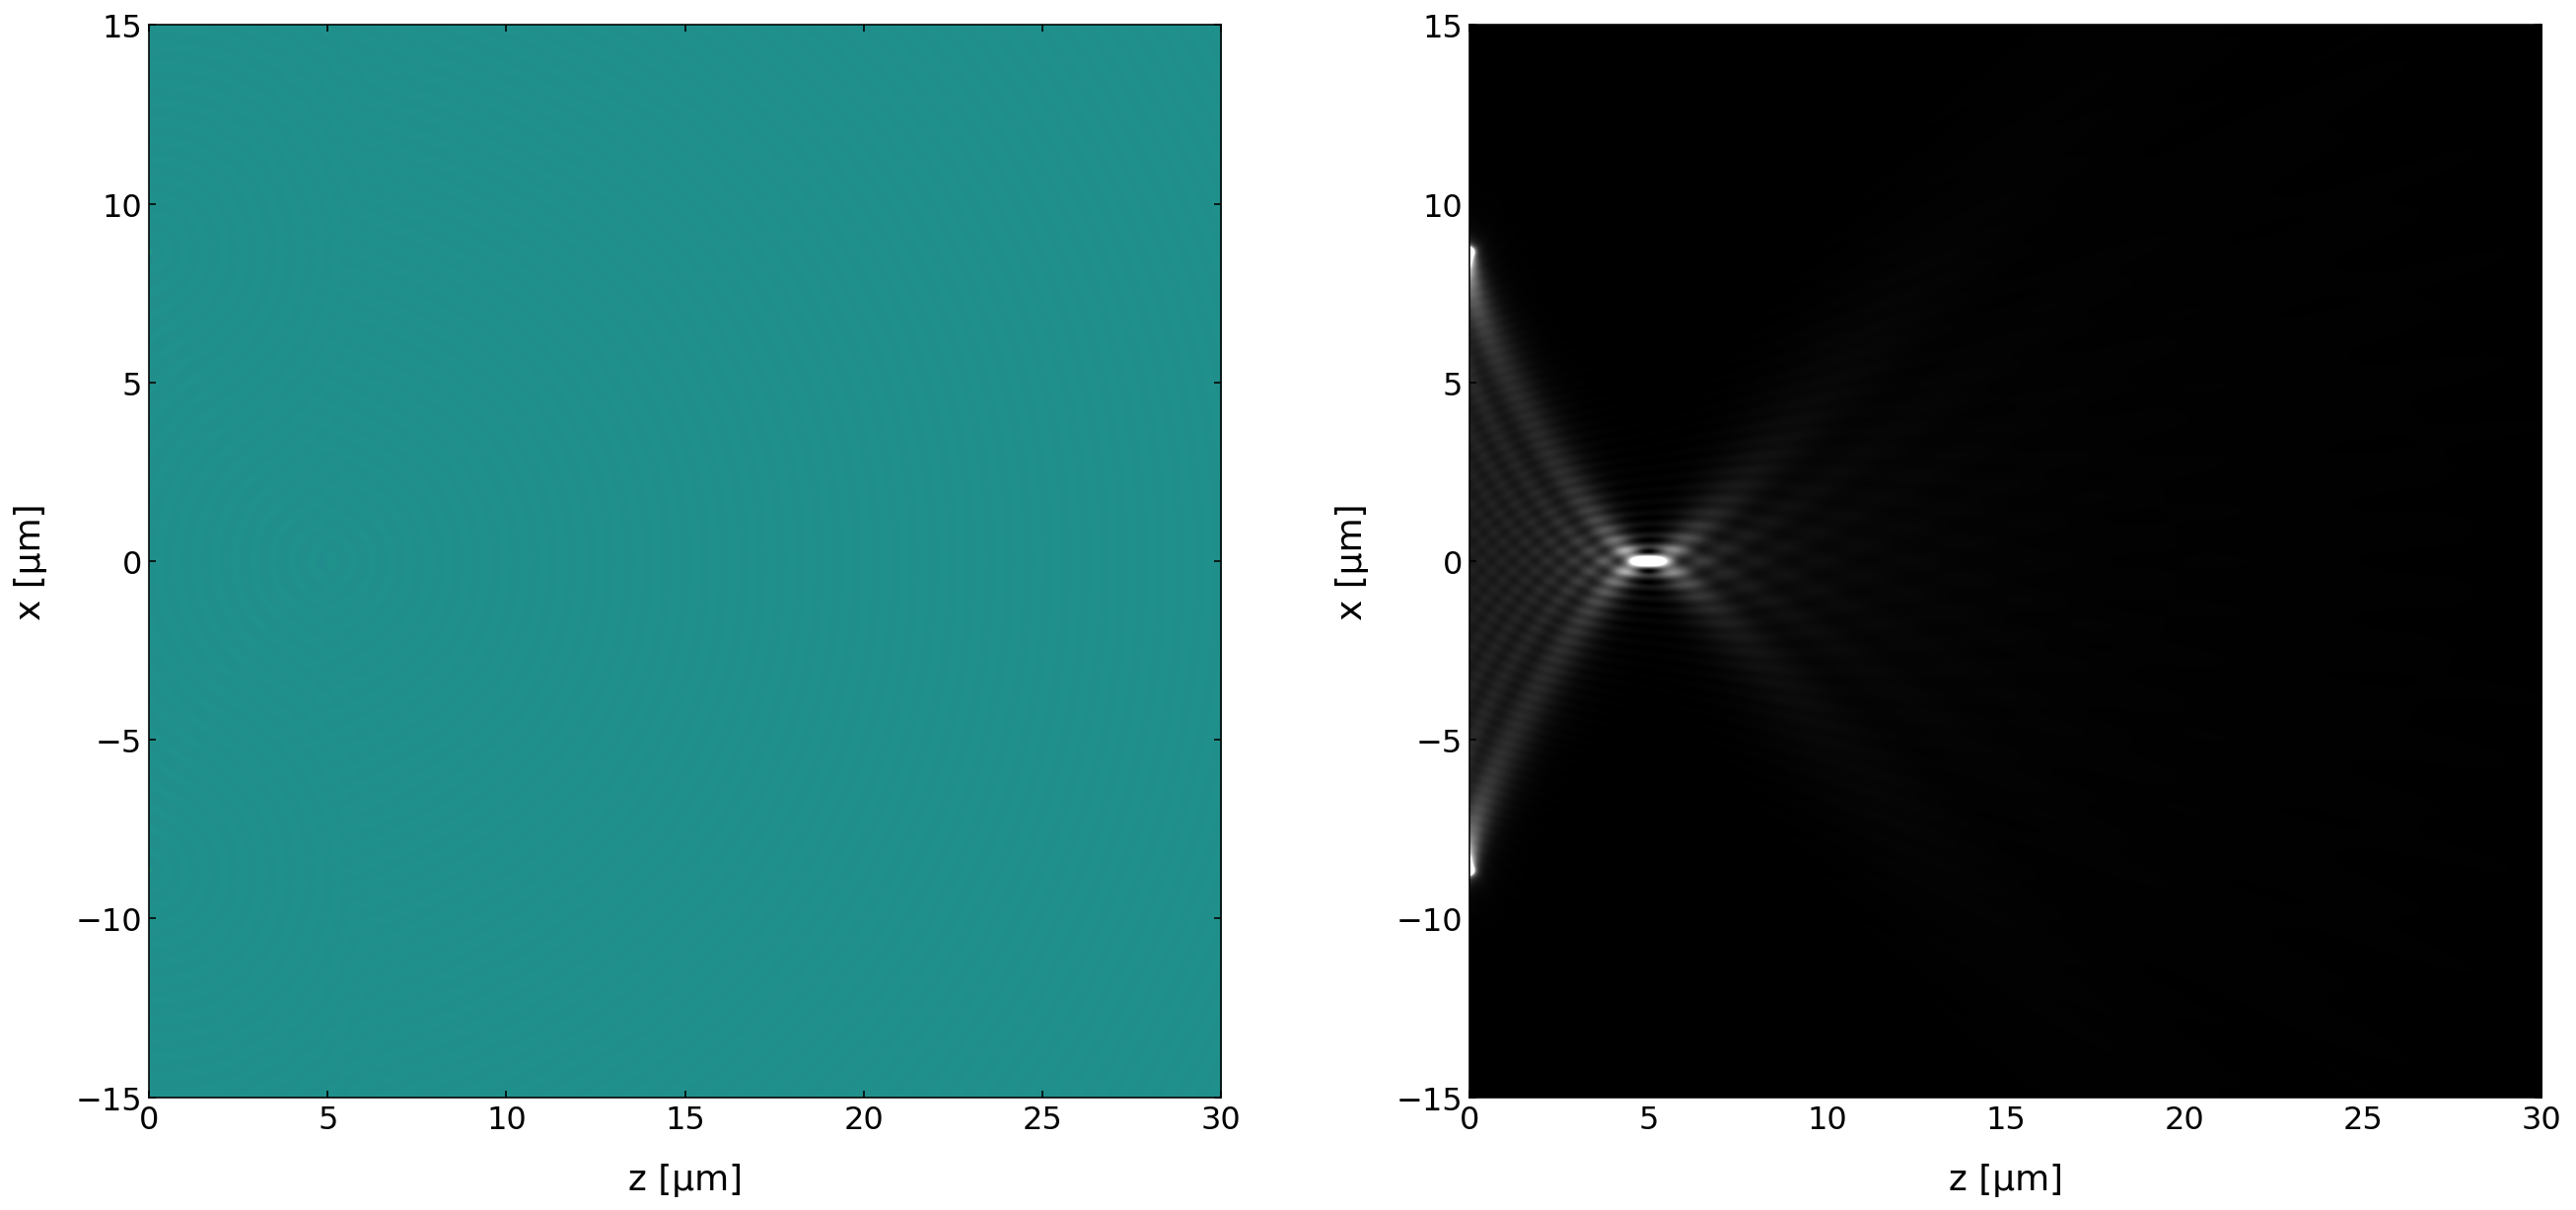

In [10]:
### BEGIN SOLUTION
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.figure(figsize=(22,10))
plt.subplot(1,2,1)
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1,vmax=1)
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')


plt.subplot(1,2,2)
plt.imshow((np.abs(field.transpose())**2),extent=extent,vmax=0.0005,cmap='gray')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.show()
### END SOLUTION

#### Task 5

Plot the intensity along the line $x=0$ by slicing through the array with the field values obtained earlier.

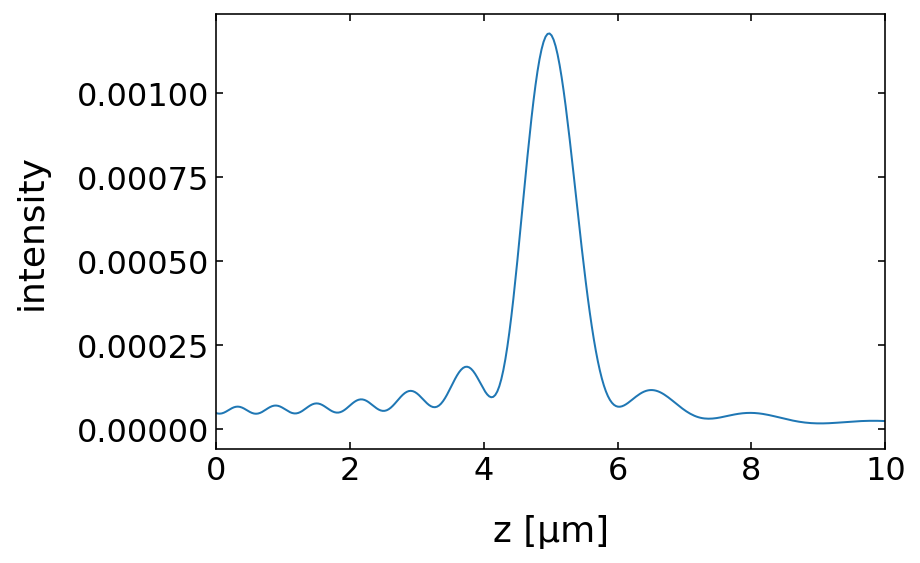

In [24]:
### BEGIN SOLUTION
plt.plot(z*1e6,np.abs(field.transpose())[500,:]**2)
plt.xlim(0,10)
plt.xlabel('z [µm]')
plt.ylabel('intensity')
plt.show()
### END SOLUTION

### Additional task: Resolution and Numerical Aperture 

The optical resolution of a microscope objective lens depends on its numerical aperture ${\rm NA}$. The numerical aperature is given by 

\begin{equation}
{\rm NA}=n\sin(\theta)
\end{equation}

where $n$ is the refractive index of the surrounding medium ($n=1$ in the case we studied). $\theta$ is the opening angle displayed in the Figure above. 

#### Task 6

Check this relation by calculating the intensity of the spherical waves from x=-5 µm to x= 5 µm at a position of z=5 µm for opening angles $\theta=35^{°}$ and $\theta=60^{°}$. Determine the position of the first minimum of the intensity in the positive x-direction relative to the maximum and plot this values as a function of the numerical aperature to verify the above resolution relation. See the following picture for a more details.

![Figure](resolution.png)

In [138]:
## Set up the domain and wave parameters

### BEGIN SOLUTION
x=np.linspace(-1e-6,1e-6,4000)
z=np.array([5e-6])

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

wavelength=532e-9
k0=2*np.pi/wavelength
k=k0*np.array([0,0,1.])
### END SOLUTION

In [136]:
## Calculate intensity and determine first minimum relative to the center

### BEGIN SOLUTION
res=[]
for angle in np.arange(35,60,1):
    theta=angle*np.pi/180
    field=objective(theta,100)
    tmp=np.argmin(np.abs(field)[0,2000:]**2)
    res.append(tmp*(x[1]-x[0]))
### END SOLUTION

Plot the resolution over the ${\rm NA}$.

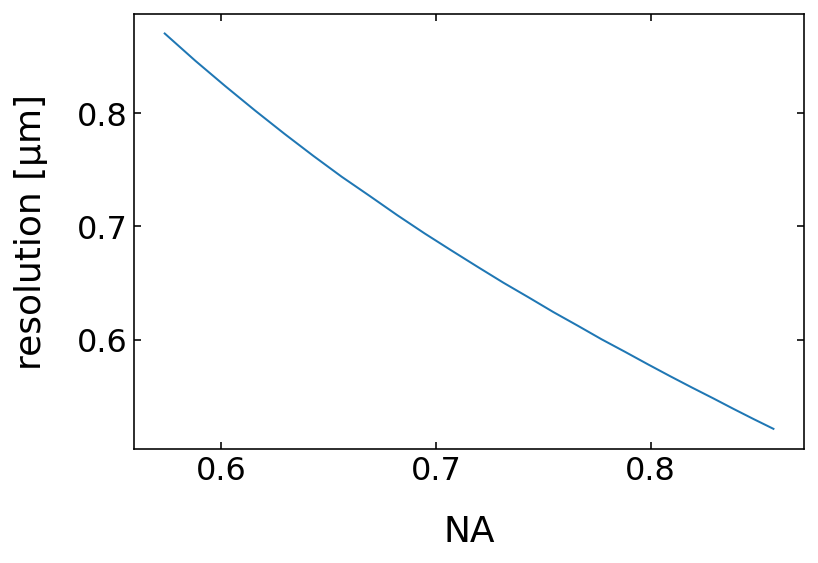

In [135]:
## Plot the solution

### BEGIN SOLUTION
plt.plot(np.sin(np.arange(35,60,1)*np.pi/180),np.array(res)*1e6)
plt.xlabel('NA')
plt.ylabel('resolution [µm]')
plt.show()
### END SOLUTION